In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score, precision_score, roc_auc_score


from PIL import Image




%matplotlib inline


In [6]:
behavior = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv")

In [7]:
behavior.head()

,age,current_income,time_spent_browsing,length_of_subscription,monthly_visits,longest_read_time,gender,prop_ads_clicked,id
0,57,74.94,680.185910,344.260552,33.612656,252.092201,man,0.177864,90
1,47,67.01,554.768760,330.549067,28.924096,119.694118,woman,0.138873,1
2,49,66.71,618.436797,247.549601,28.274578,321.450862,woman,0.200859,125
3,47,79.20,560.599752,269.378967,30.471076,179.349038,woman,0.191236,164
4,50,68.39,628.441198,260.282353,32.486453,213.114138,man,0.089133,75


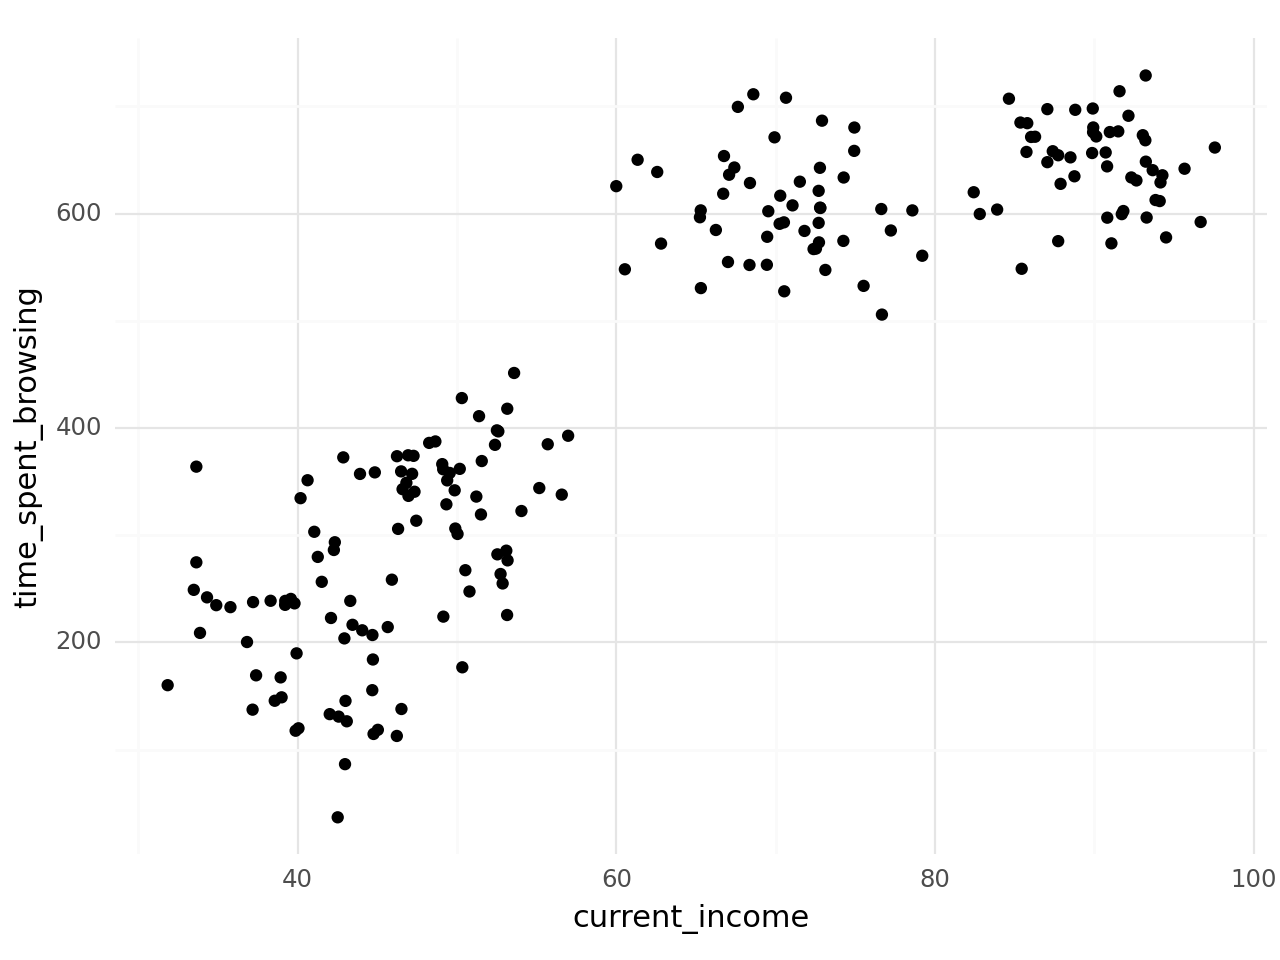

<Figure Size: (640 x 480)>

In [8]:
(ggplot(behavior, aes(x = "current_income", y = "time_spent_browsing" )) +
geom_point() + theme_minimal())

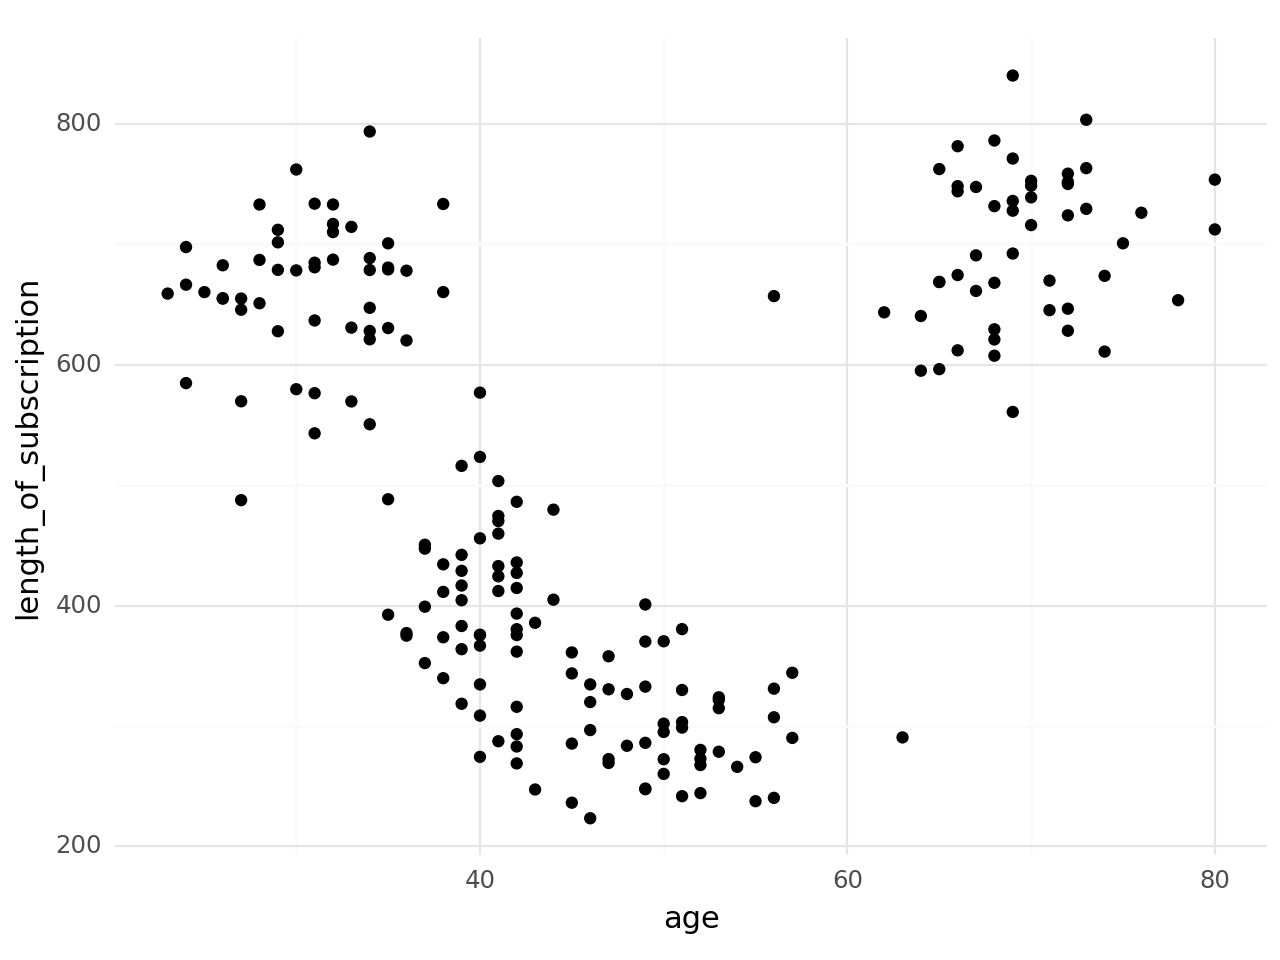

<Figure Size: (640 x 480)>

In [9]:
(ggplot(behavior, aes(x = "age", y = "length_of_subscription" )) +
geom_point() + theme_minimal())

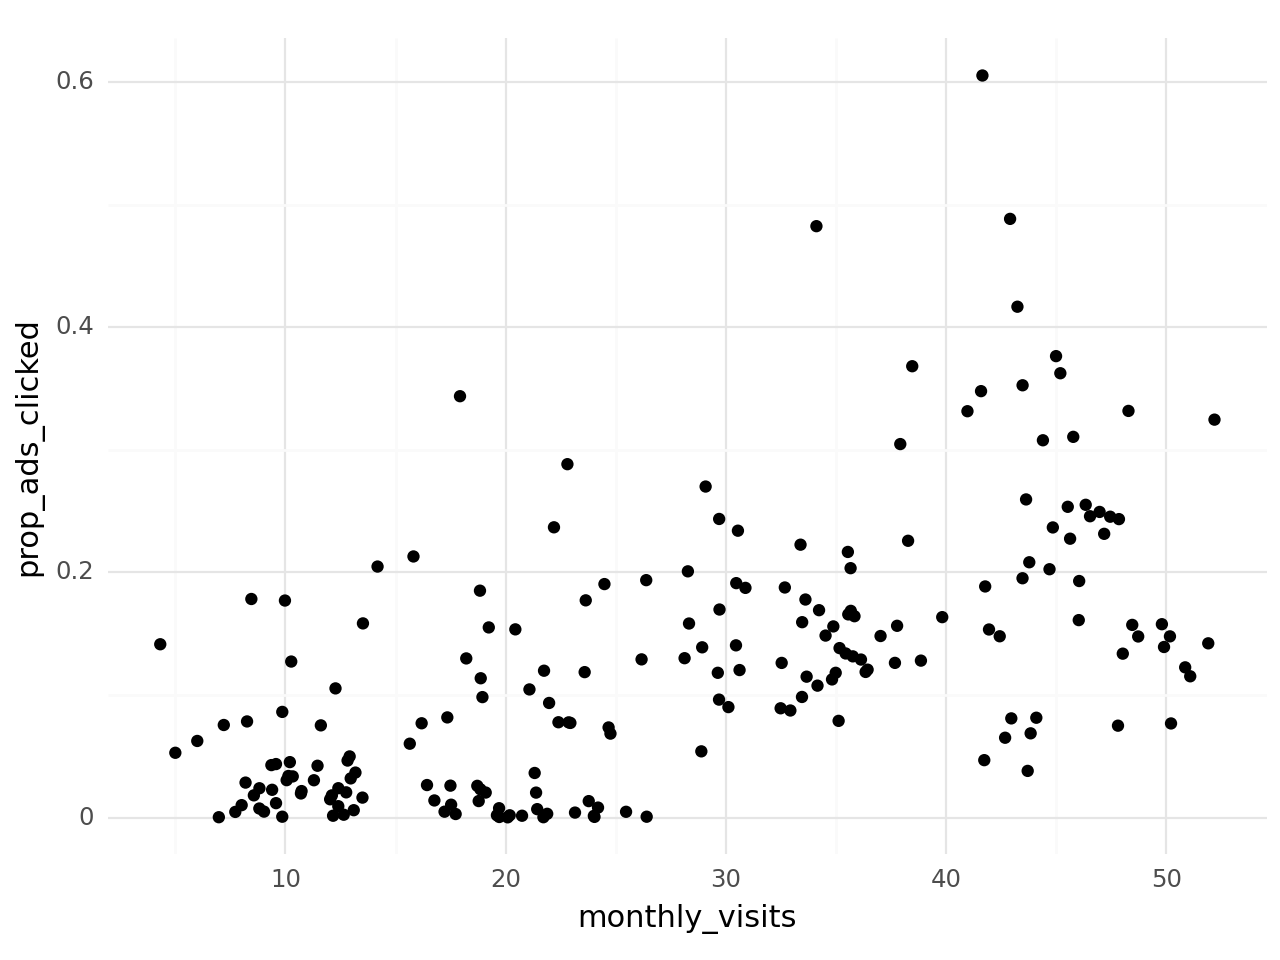

<Figure Size: (640 x 480)>

In [10]:
(ggplot(behavior, aes(x = "monthly_visits", y = "prop_ads_clicked" )) +
geom_point() + theme_minimal())

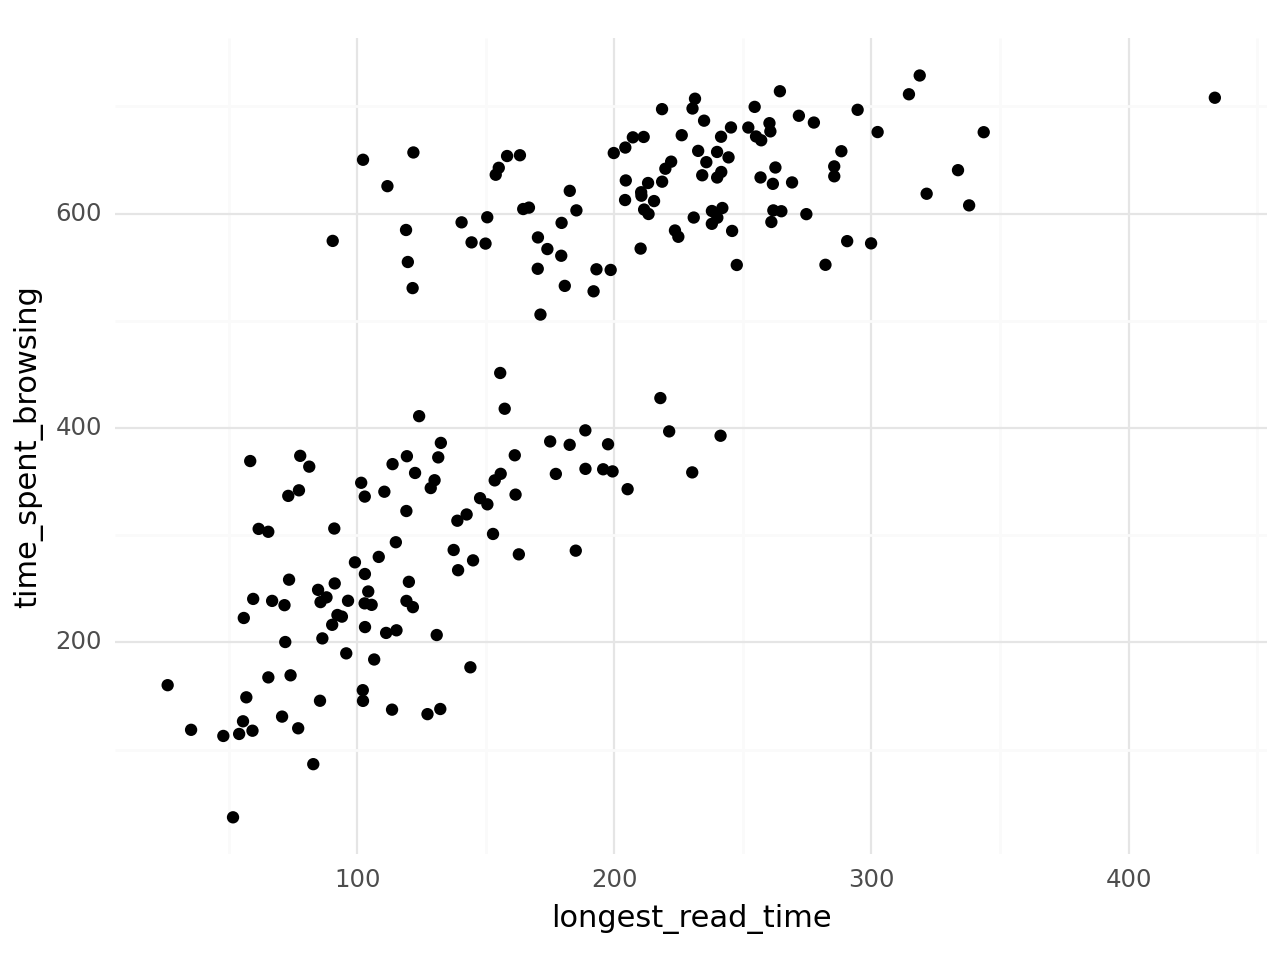

<Figure Size: (640 x 480)>

In [11]:
(ggplot(behavior, aes(x = "longest_read_time", y = "time_spent_browsing" )) +
geom_point() + theme_minimal())

0.6119422076905741
1093640405.4243953


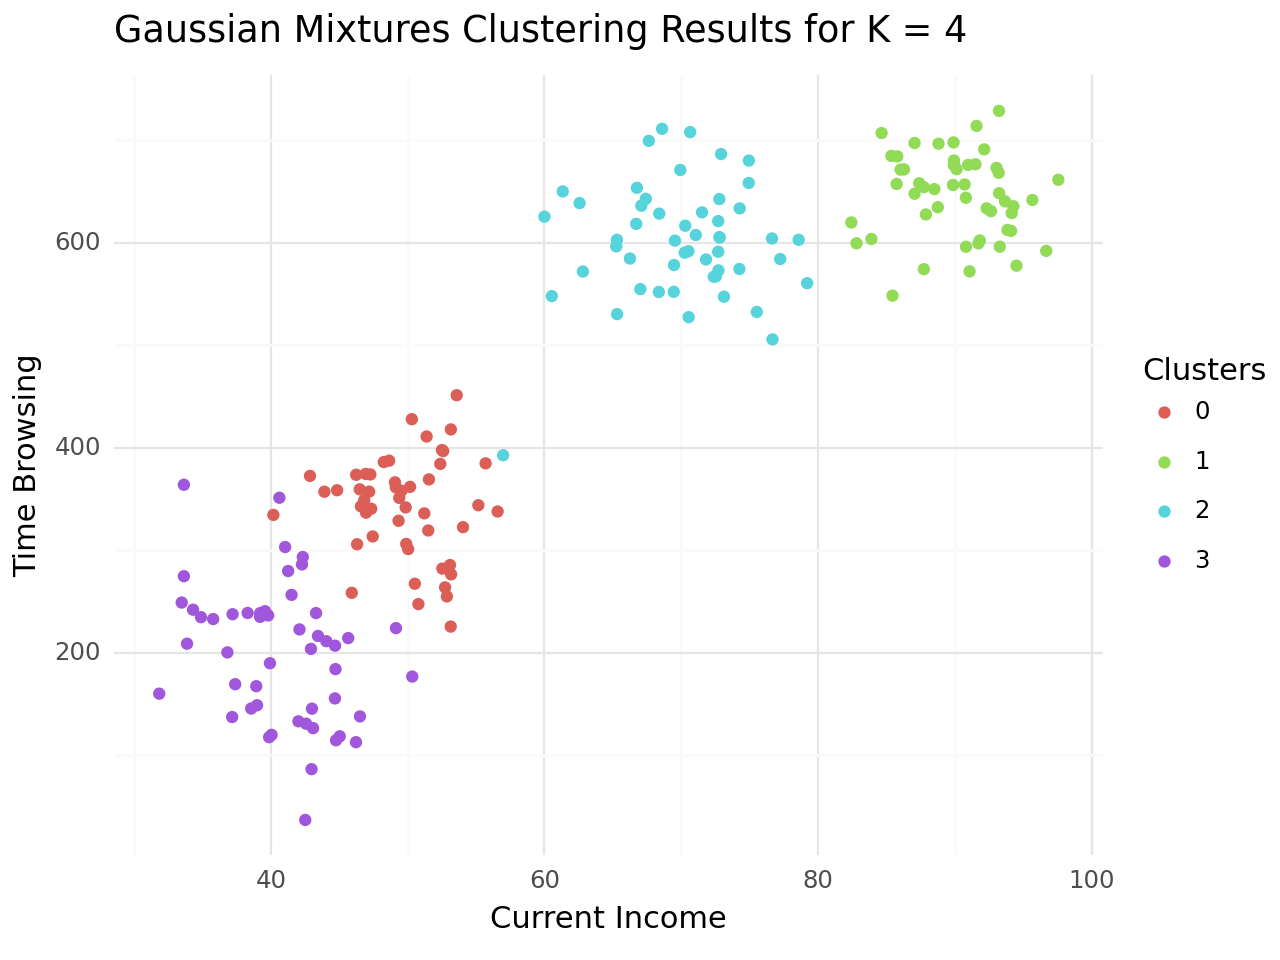

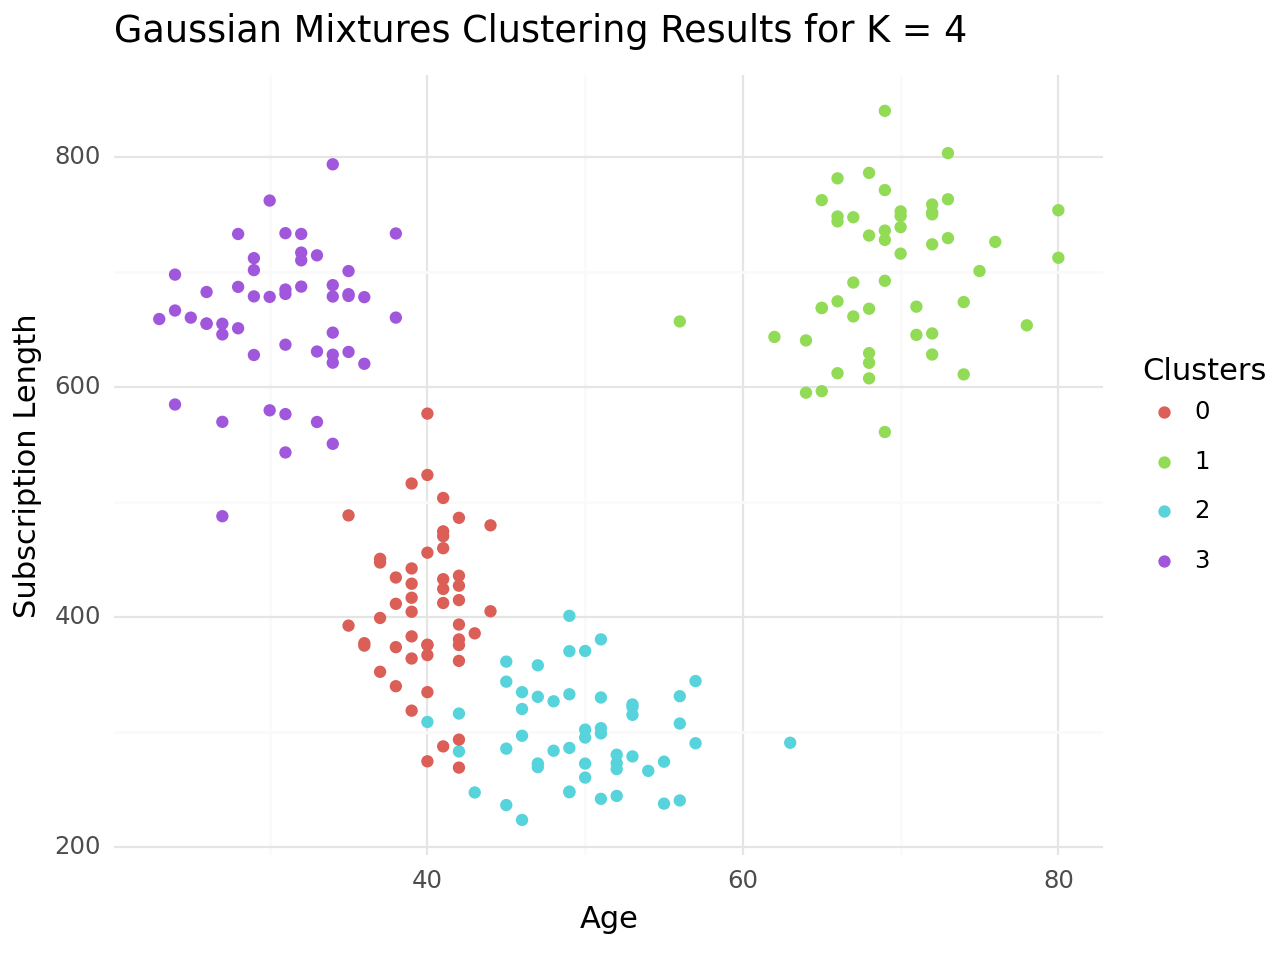

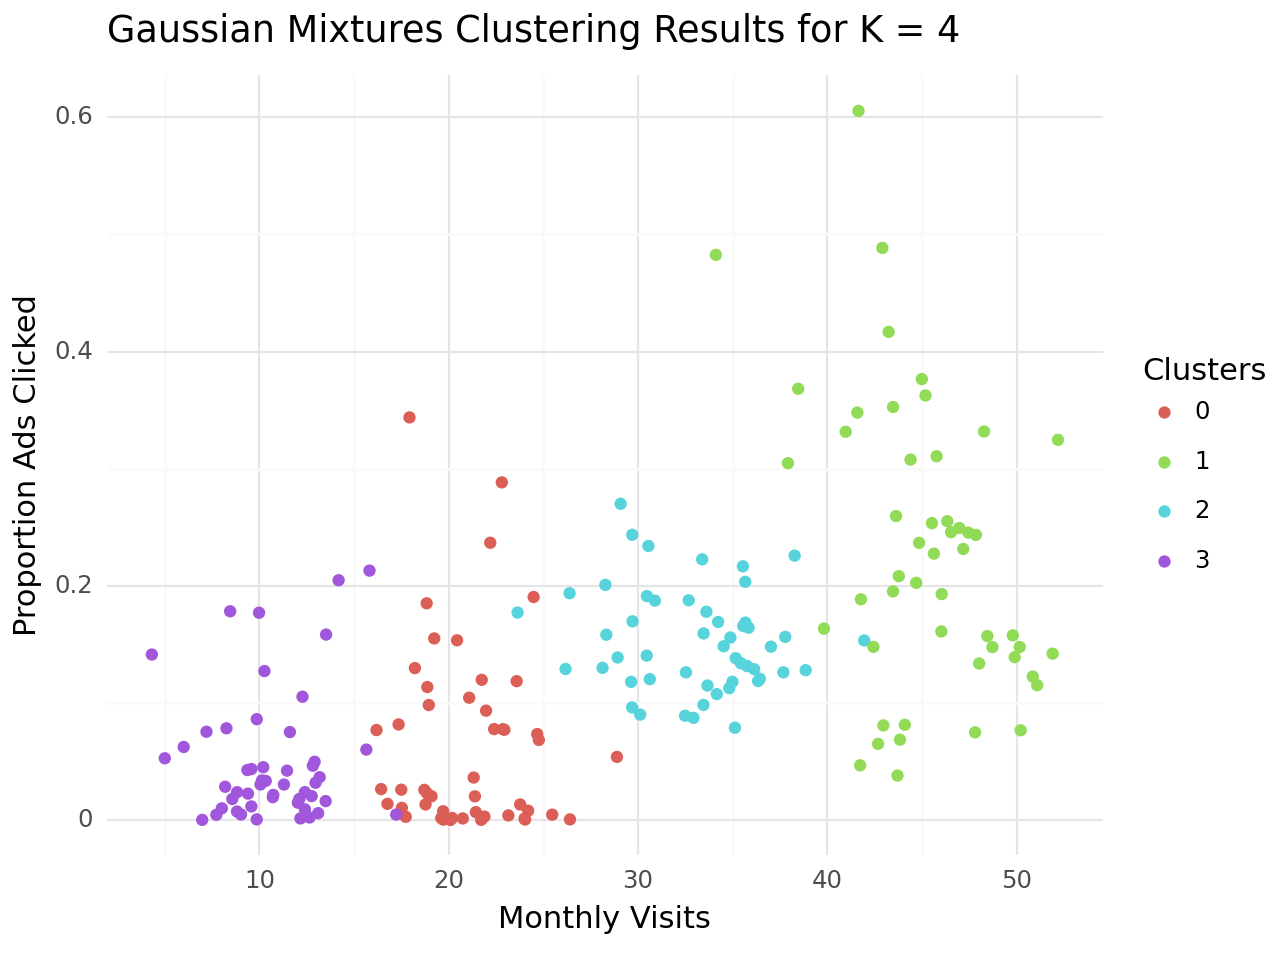

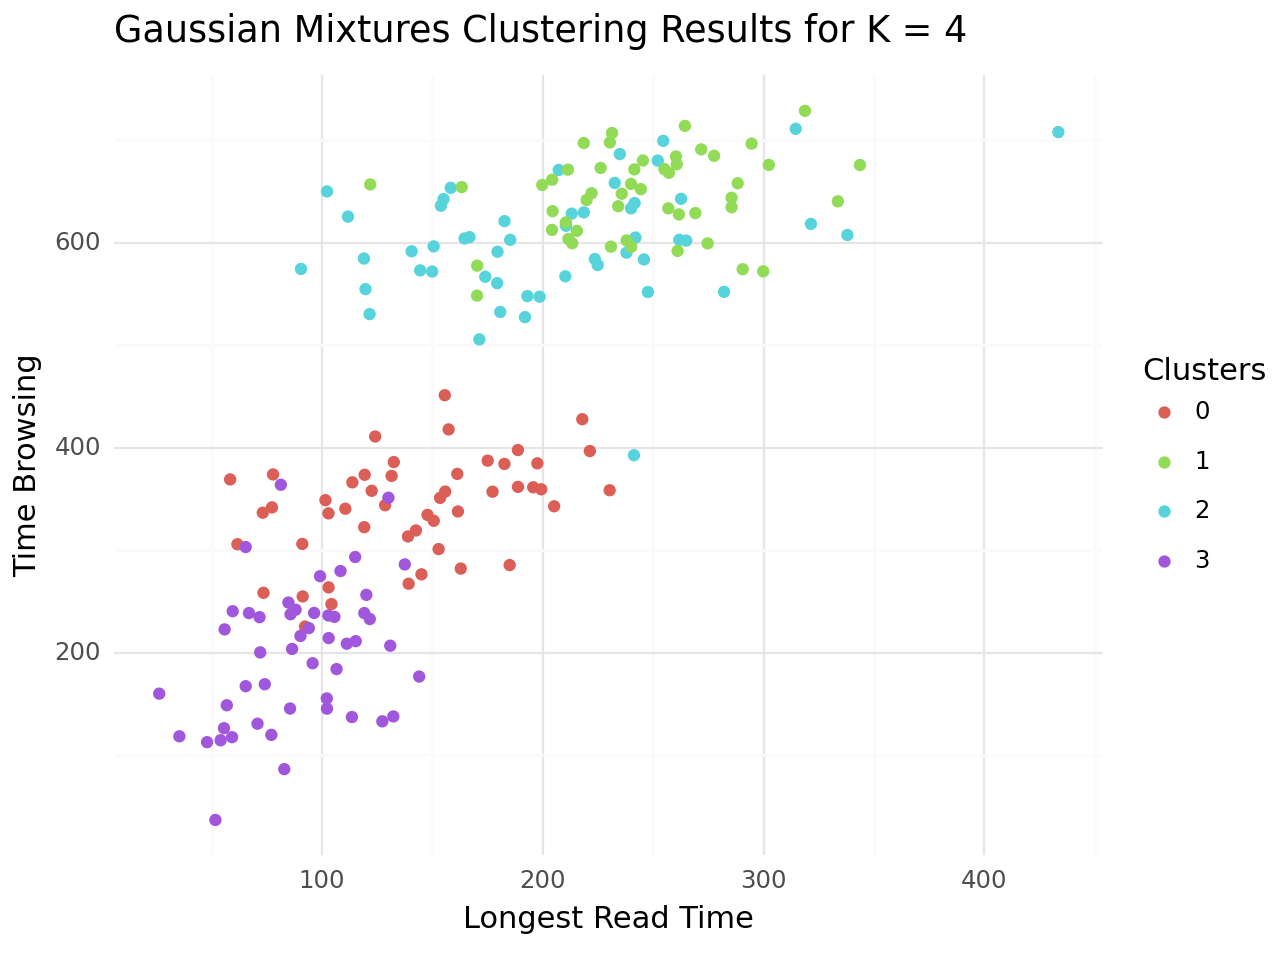

In [12]:
predictors = ["age",	"current_income",	"time_spent_browsing",	"length_of_subscription",	"monthly_visits",	"longest_read_time",		"prop_ads_clicked"]
X = behavior[predictors]

z = make_column_transformer((StandardScaler(), predictors), remainder = "passthrough")

gmm = GaussianMixture(n_components = 4)
pipe = Pipeline([("z", z), ("clust", gmm)])

#km = KMeans(n_clusters = 3)
#pipe = Pipeline([("z", z), ("clust", km)])

labels = pipe.fit_predict(X)


print(silhouette_score(X, pipe.predict(X)))
print(gmm.bic(X))
X["clusters"] = labels

print(ggplot(X, aes(x = "current_income", y = "time_spent_browsing", color ="factor(clusters)" )) +
geom_point() + theme_minimal() +
labs(x = "Current Income", y = "Time Browsing", title = "Gaussian Mixtures Clustering Results for K = 4", color = "Clusters"))

print(ggplot(X, aes(x = "age", y = "length_of_subscription", color = "factor(clusters)" )) +
geom_point() + theme_minimal() +
labs(x = "Age", y = "Subscription Length", title = "Gaussian Mixtures Clustering Results for K = 4", color = "Clusters"))

print(ggplot(X, aes(x = "monthly_visits", y = "prop_ads_clicked", color ="factor(clusters)" )) +
geom_point() + theme_minimal() +
labs(x = "Monthly Visits", y = "Proportion Ads Clicked", title = "Gaussian Mixtures Clustering Results for K = 4", color = "Clusters"))

print(ggplot(X, aes(x = "longest_read_time", y = "time_spent_browsing", color ="factor(clusters)" )) +
geom_point() + theme_minimal() +
labs(x = "Longest Read Time", y = "Time Browsing", title = "Gaussian Mixtures Clustering Results for K = 4", color = "Clusters"))

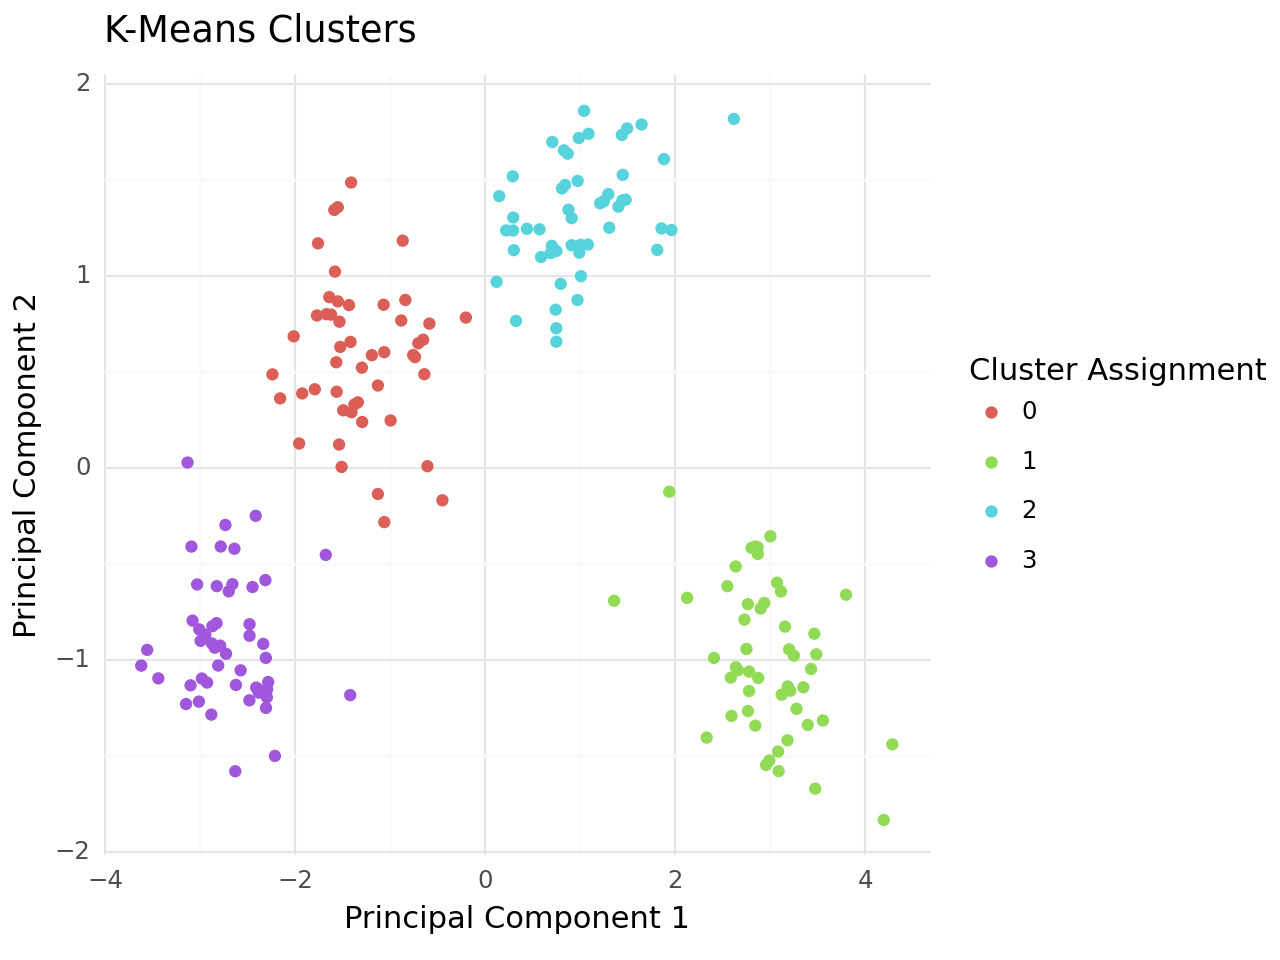

<Figure Size: (640 x 480)>

In [14]:
pca = PCA(n_components = 2)
pipe_pca = Pipeline([
("z", z),
("pca", pca)
])

pipe_pca.fit(X[predictors])

behavior["clusters"] = labels
behavior[["pc1", "pc2"]] = pd.DataFrame(pipe_pca.transform(behavior[predictors]))

(ggplot(behavior, aes(x = "pc1", y = "pc2", color = "factor(clusters)")) +
geom_point() + theme_minimal() +
labs(x = "Principal Component 1", y = "Principal Component 2", title = "K-Means Clusters") +
scale_color_discrete(name = "Cluster Assignment"))

In [15]:
#other cluster summary
cluster_summary = X.groupby('clusters').mean()

print(cluster_summary)

                age  current_income  time_spent_browsing  \
clusters                                                   
0         39.857143       49.743061           342.060758   
1         69.380000       90.149800           645.677263   
2         49.862745       69.980196           600.797654   
3         30.700000       40.713400           199.091869   

          length_of_subscription  monthly_visits  longest_read_time  \
clusters                                                              
0                     407.616388       21.031827         140.816451   
1                     698.608170       45.221277         244.238716   
2                     298.499386       33.074493         206.716388   
3                     660.924034       10.668075          89.714911   

          prop_ads_clicked  
clusters                    
0                 0.065174  
1                 0.228305  
2                 0.152387  
3                 0.051094  


In [16]:
#article data
articles = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv")

In [17]:
articles.head(10)

,Stocks,Productivity,Fashion,Celebrity,Cryptocurrency,Science,Technology,SelfHelp,Fitness,AI,id
0,3,12,9,9,1,1,5,1,0,1,198
1,1,0,1,1,0,8,4,10,4,0,92
2,4,1,11,1,6,11,0,9,0,0,75
3,2,6,8,1,15,1,1,9,8,0,147
4,1,2,4,4,6,6,2,1,3,4,136
5,2,5,14,2,0,2,3,1,17,0,140
6,0,1,0,2,0,4,4,2,1,9,175
7,6,7,0,1,17,3,7,4,0,2,9
8,1,1,3,0,0,2,13,1,1,3,156
9,1,3,2,6,2,6,2,4,2,6,36


In [18]:
features = ["Stocks", "Productivity", "Fashion", "Celebrity", "Cryptocurrency", "Science", "Technology", "SelfHelp","Fitness", "AI"]
X = articles[features]

In [19]:
hac = AgglomerativeClustering(affinity = "cosine",
linkage = "average",
distance_threshold= 0,
n_clusters = None)

In [20]:
pipe2 = Pipeline([("model", hac)])

In [21]:
def plot_dendrogram(pipe, **kwargs):
  if "model" not in pipe.named_steps.keys():
    raise NameError("Your clustering pipeline step must be called 'model'for this function to work.")
# create the counts of samples under each node
  counts = np.zeros(pipe.named_steps["model"].children_.shape[0])
  n_samples = len(pipe.named_steps["model"].labels_)
  for i, merge in enumerate(pipe.named_steps["model"].children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 # leaf node
      else:
        current_count += counts[child_idx - n_samples]
        counts[i] = current_count
  linkage_matrix = np.column_stack([pipe.named_steps["model"].children_, pipe.named_steps["model"].distances_, counts]).astype(float)
# Plot the corresponding dendrogram
  sch.dendrogram(linkage_matrix, **kwargs)

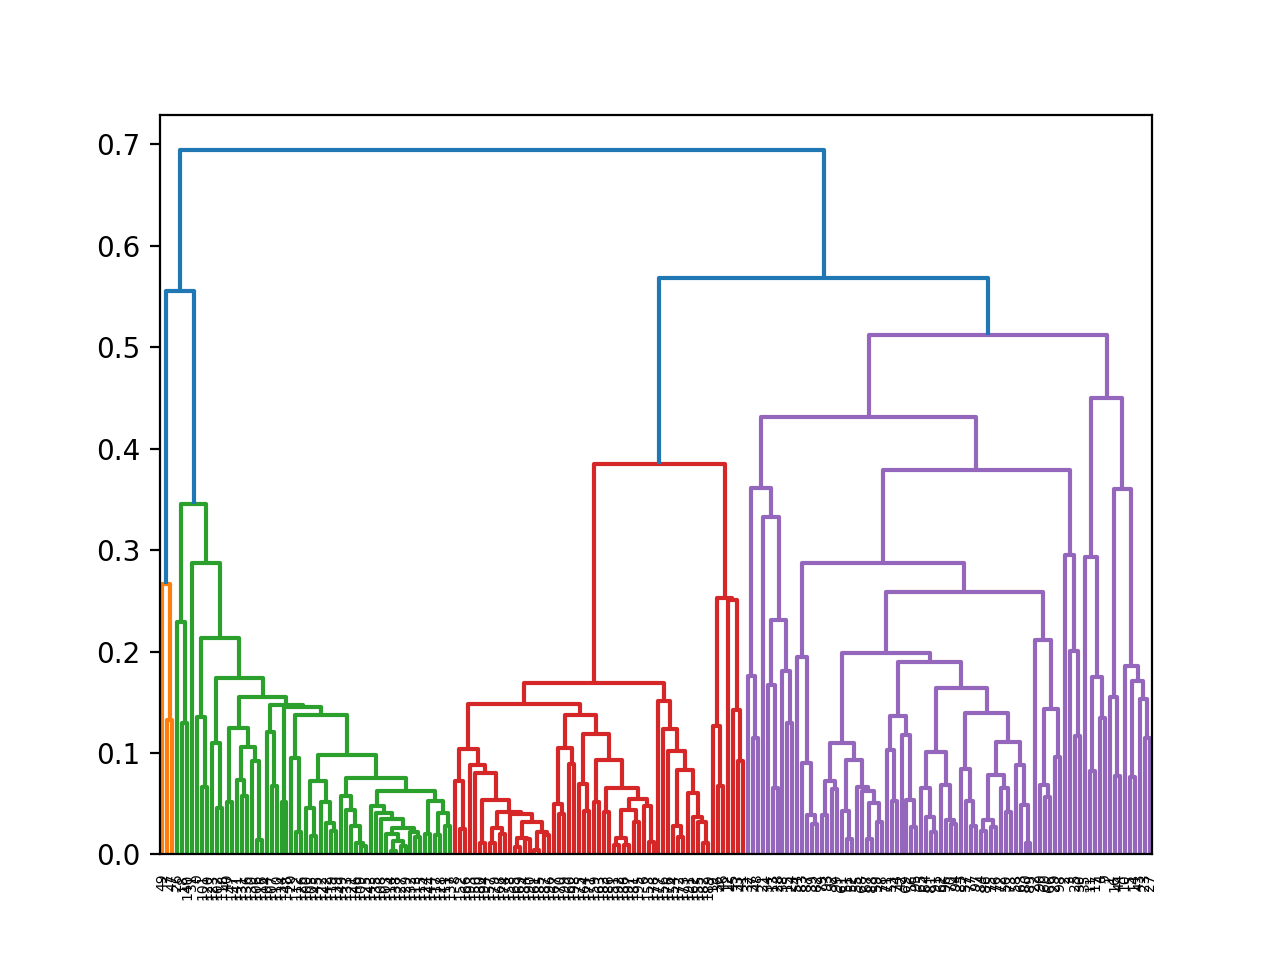

In [22]:
# fit model and get labels
labels = pipe2.fit_predict(X[features])

plot_dendrogram(pipe2, color_threshold = 0.55)



In [23]:
# re-fit empty model with num clusters
hac = AgglomerativeClustering(affinity = "cosine",
linkage = "average",
n_clusters = 3)
pipe2 = Pipeline([("model", hac)])
# fit model and get labels
labels = pipe2.fit_predict(X[features])
# look at cluster performance
print(silhouette_score(X[features], labels))
articles["cluster_3"] = labels

0.27926802225748576


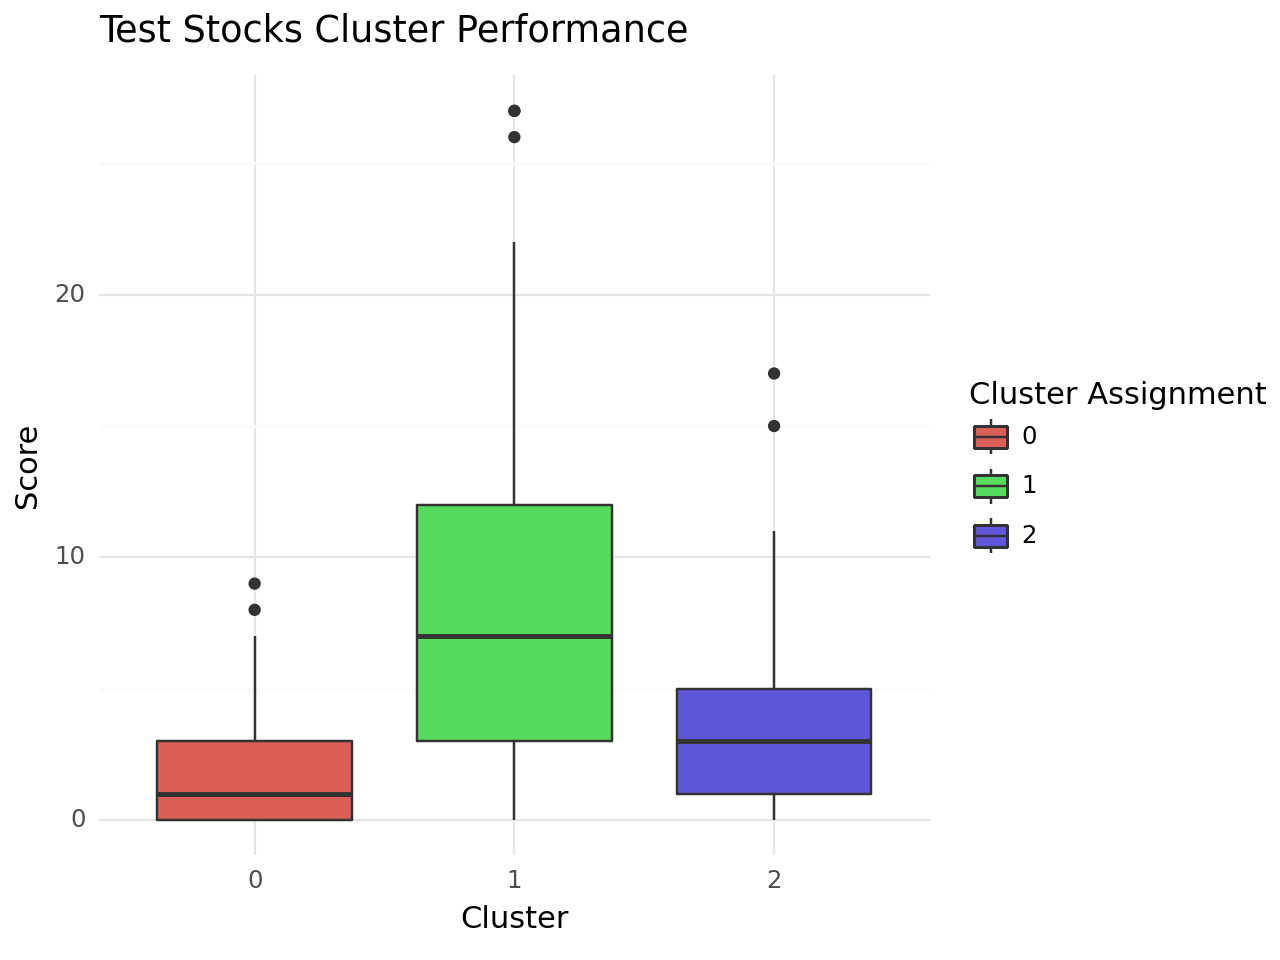

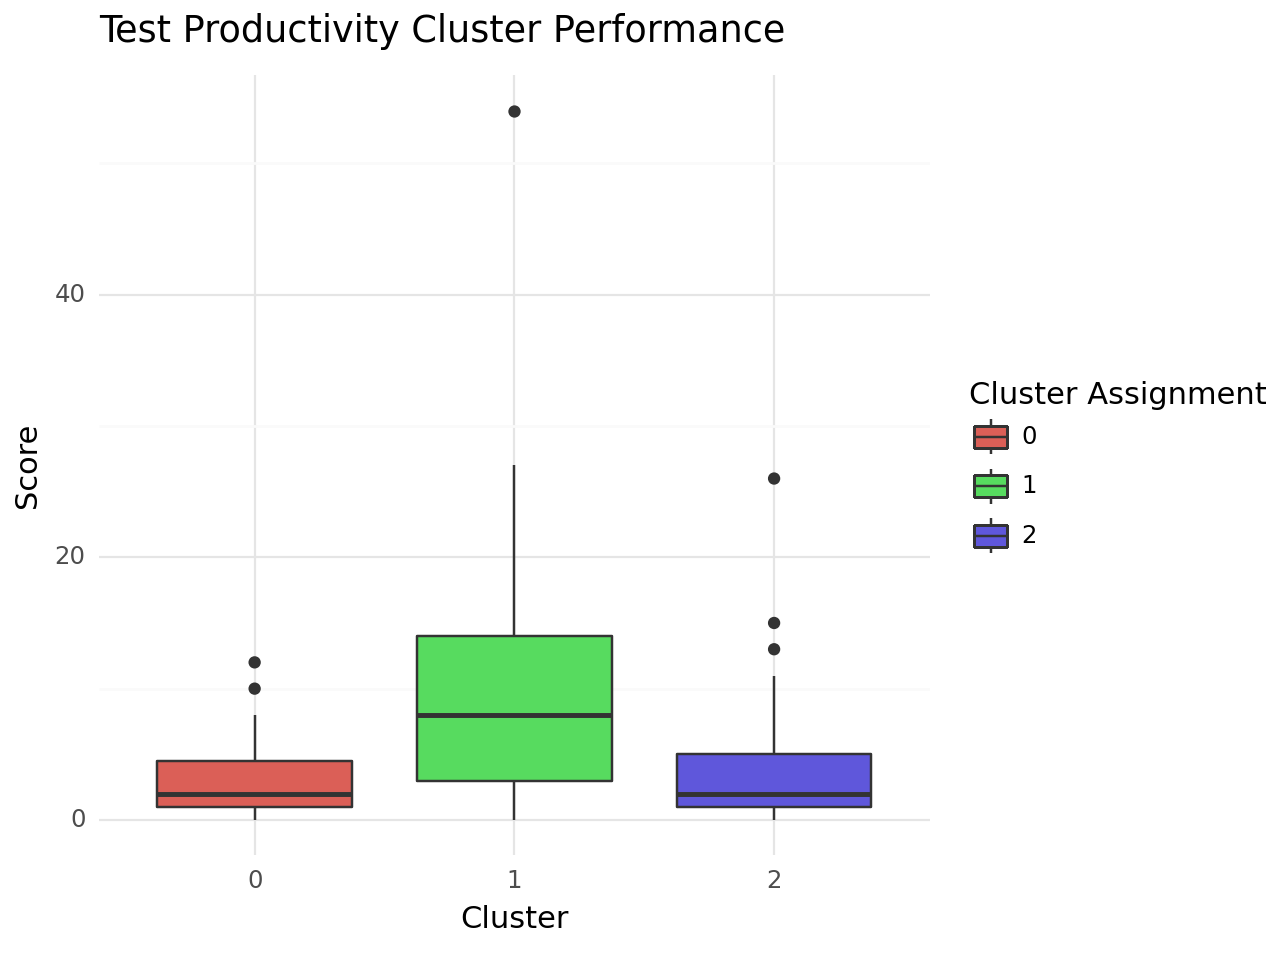

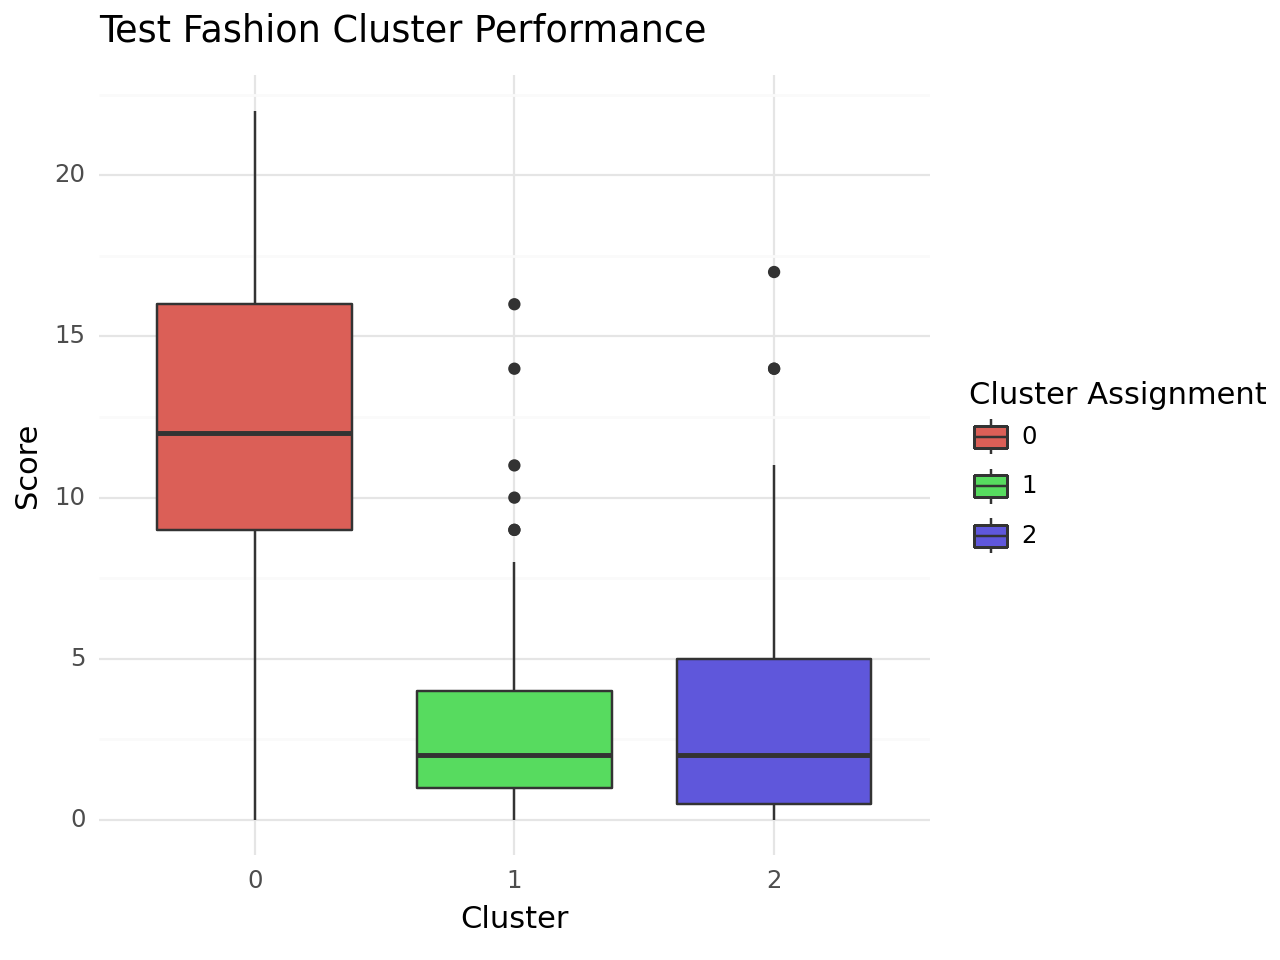

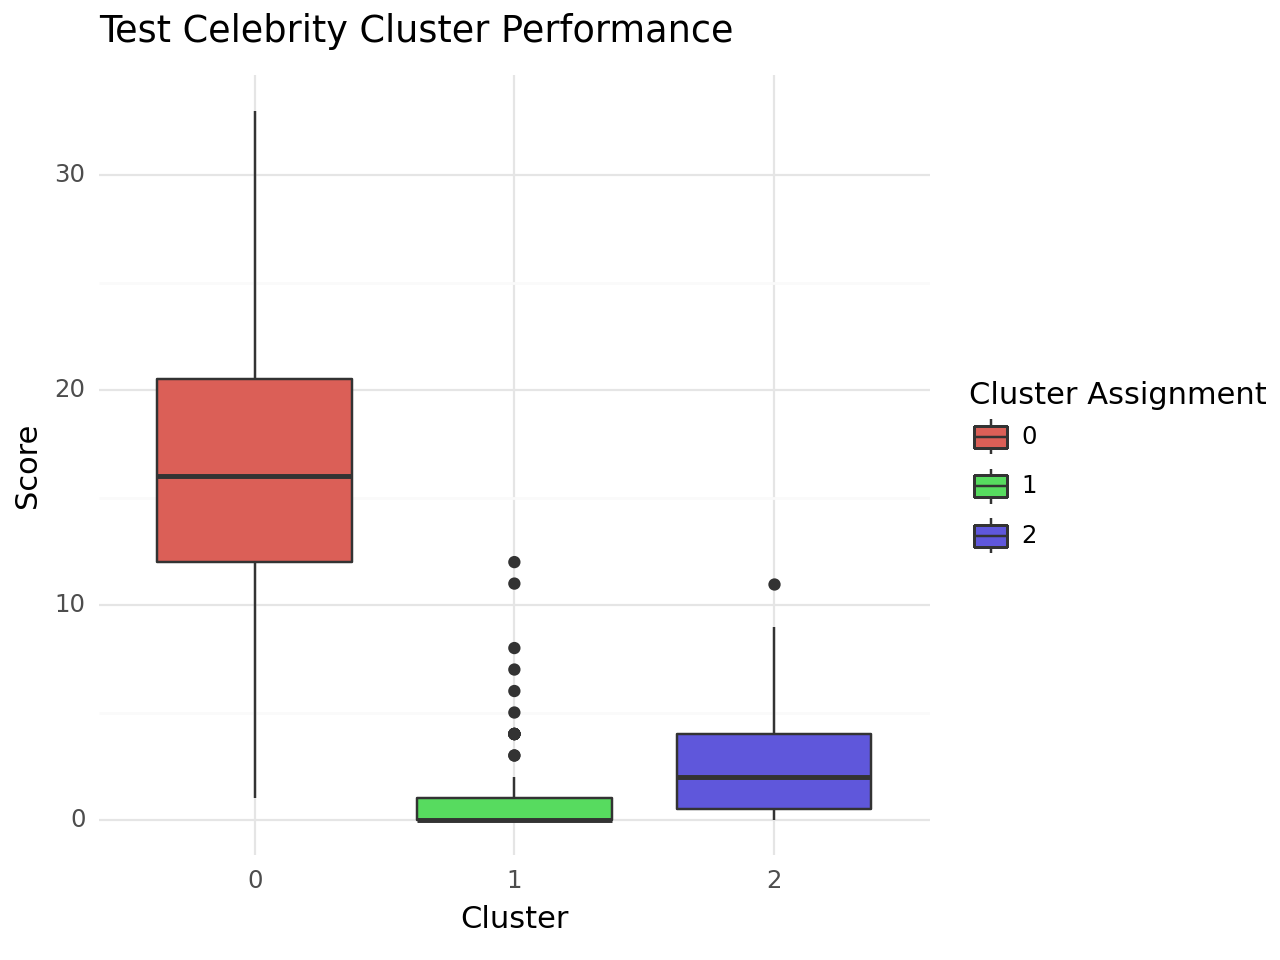

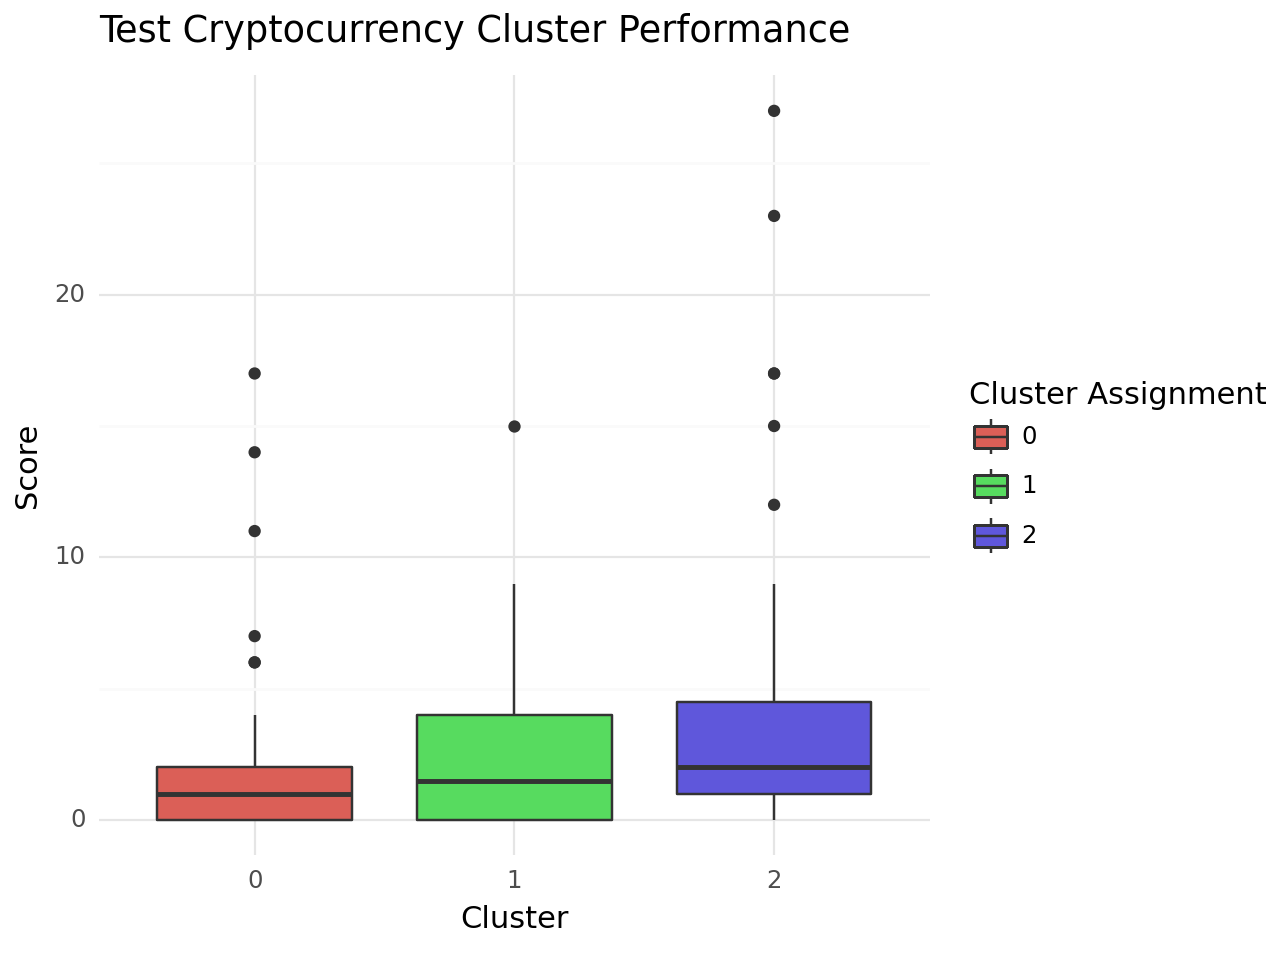

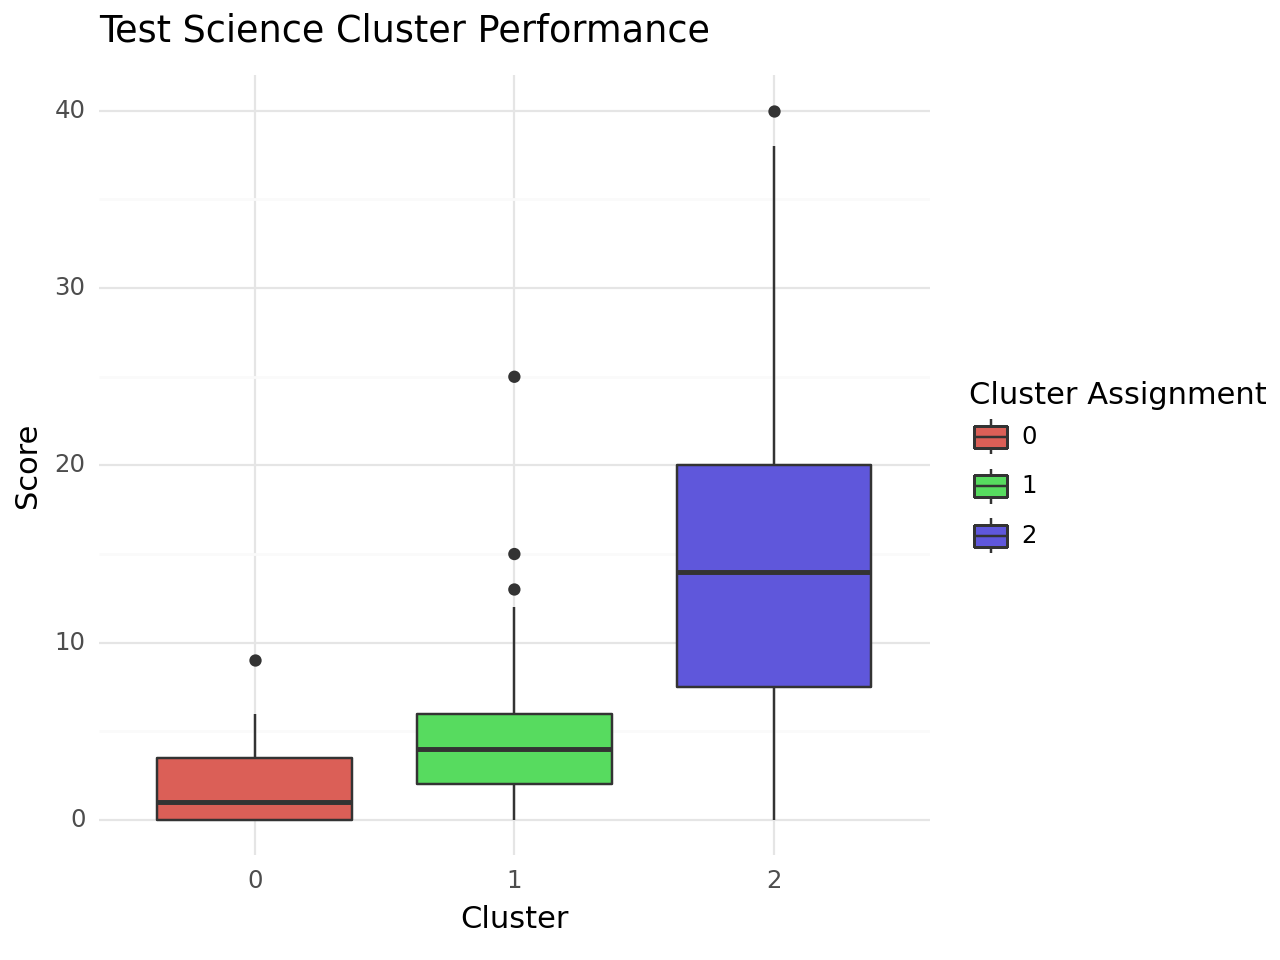

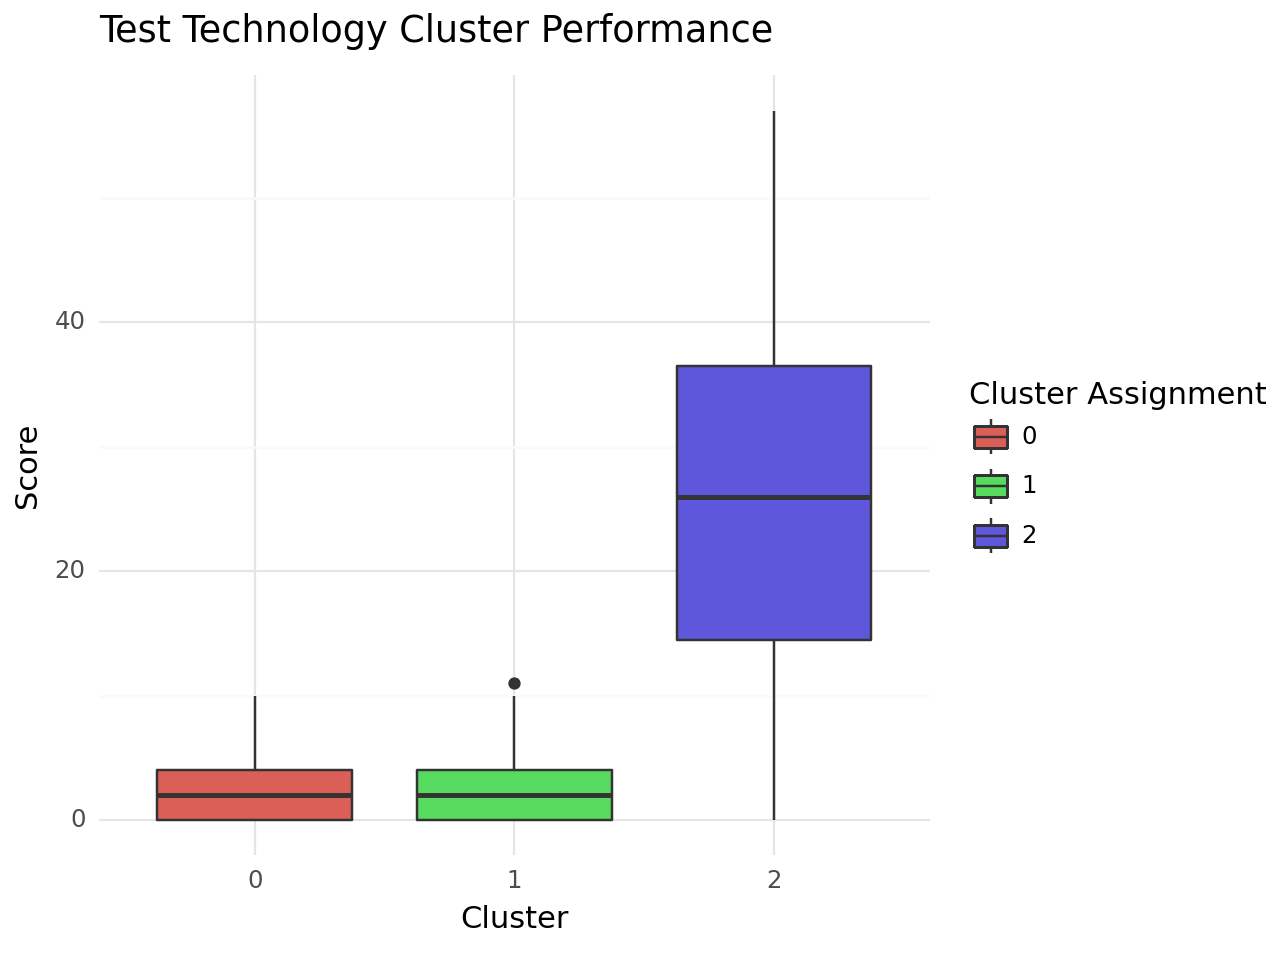

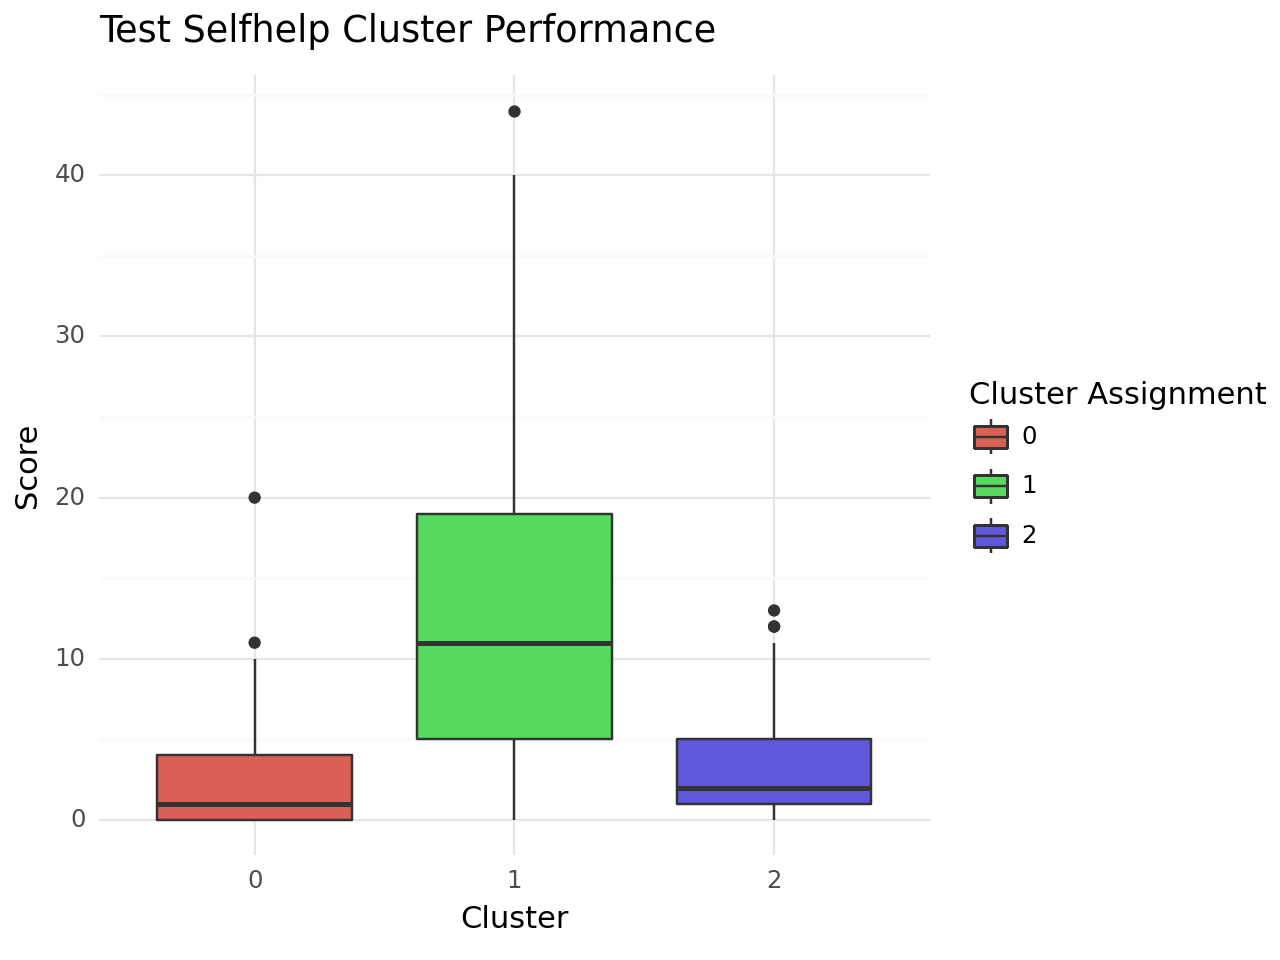

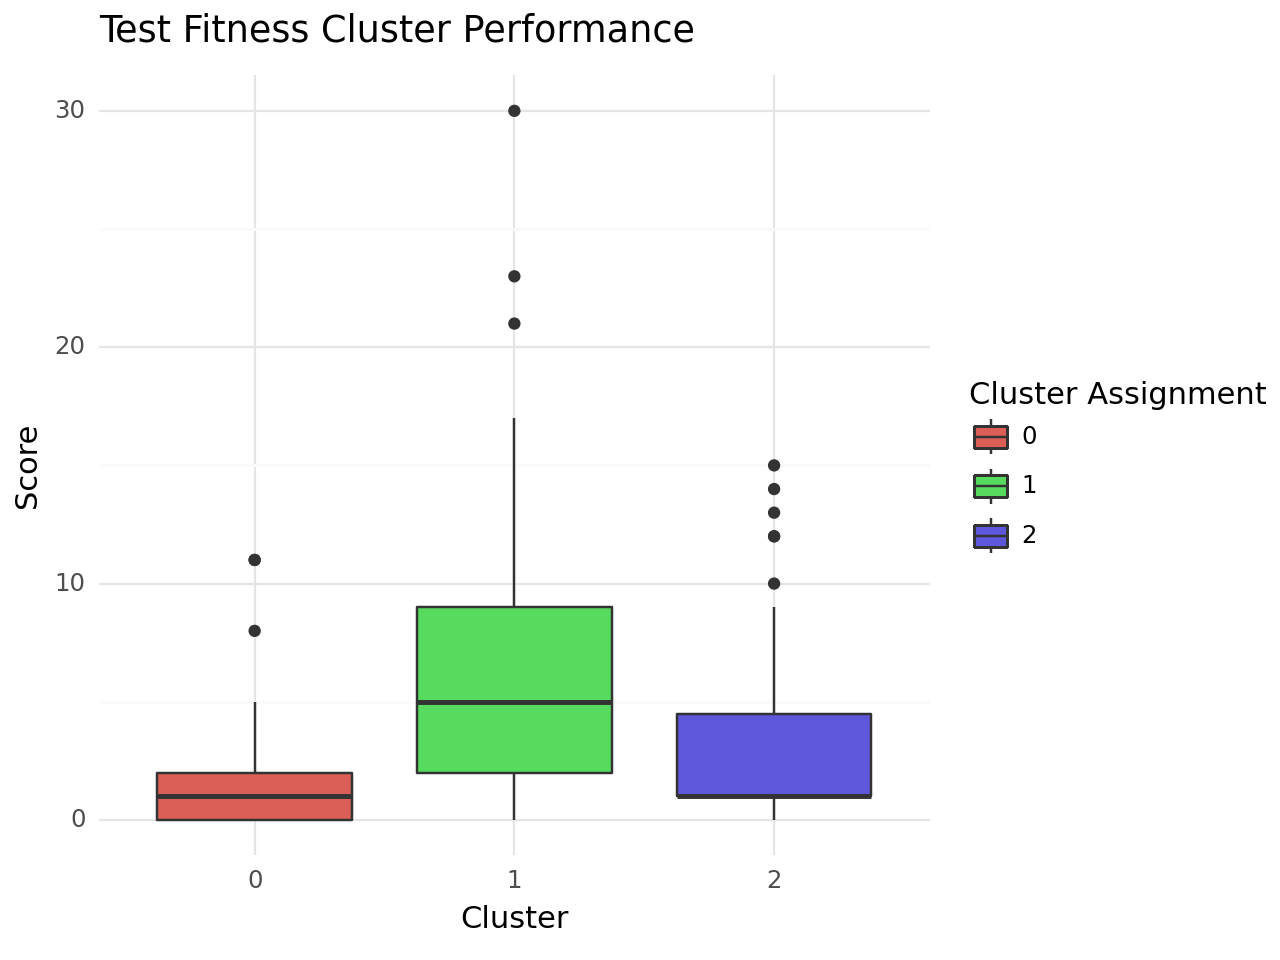

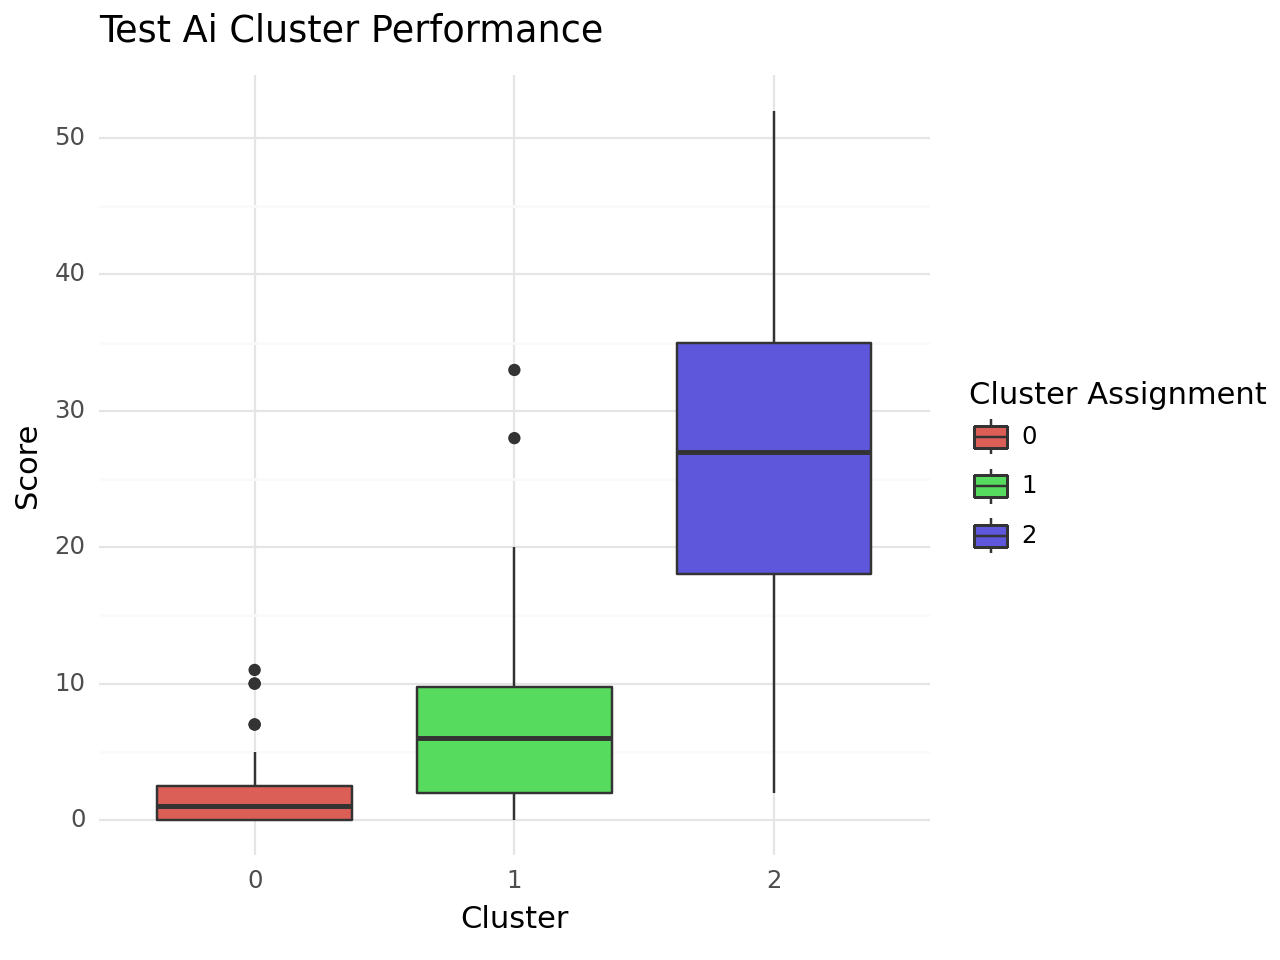

In [24]:
for test in features:
  title = "Test " + test.capitalize() + " Cluster Performance"
  print(ggplot(articles, aes(x = "factor(cluster_3)", y = test))
  + geom_boxplot(aes(fill = "factor(cluster_3)")) +
  theme_minimal() +
  scale_fill_discrete(name = "Cluster Assignment") +
  labs(x = "Cluster",
  y = "Score",
  title = title))